In [1]:
 """
Use to be able to retrieve modules and import in core and app directorie
"""
from os import sys, path
sys.path.append(path.dirname(path.dirname(path.abspath("__file__"))))
print(sys.path)

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src']


In [2]:
import datetime
import glob
from os import path
import warnings

import numpy as np

import pyat.core.Utils.MatrixInspector as scope
import pyat.core.Utils.TiffDriver as tiff
import stage.DirectorySettings as directories
from stage.Export_Geotiff import Export_File
from stage.GeoTiffNormalComputer import GeoTiffNormalComputer

warnings.filterwarnings('ignore')

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src', 'C:\\Users\\krodrigu\\Desktop\\Stage_K

In [3]:
mnt_filename = "C:/Users/krodrigu/Documents/pyat/2019_10_30_13_12_32.tif"
now = datetime.datetime.now()
normal_filename_z = path.join(
    directories.output_dir,
    "max_slope_degree" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

In [4]:
normal = GeoTiffNormalComputer(mnt_filename)
normal.compute_normal()
nx, ny, nz = normal.get_normal()
slope = np.pi / 2 - np.arccos((nx ** 2 + ny ** 2) / np.sqrt(nx ** 2 + ny ** 2))

compute normal to the geotiff surface


In [5]:
export_to_geotiff = Export_File()
reference_dataset, grid = normal.get_reference()
export_to_geotiff.export(normal_filename_z, np.degrees(slope), reference_dataset, grid)

writing file C:/Users/krodrigu/Documents/pyat/max_slope_degree2019_11_27_10_15_26.tif


In [6]:
# Max slope computed and saved as a Geotiff 
# Saved as :
normal_filename_z

'C:/Users/krodrigu/Documents/pyat/max_slope_degree2019_11_27_10_15_26.tif'

Mean :  3.2962132
Max :  68.02314
Min :  0.0017553585
Median :  2.3591745
Std :  3.2409368
                                         Max slope computed                                         


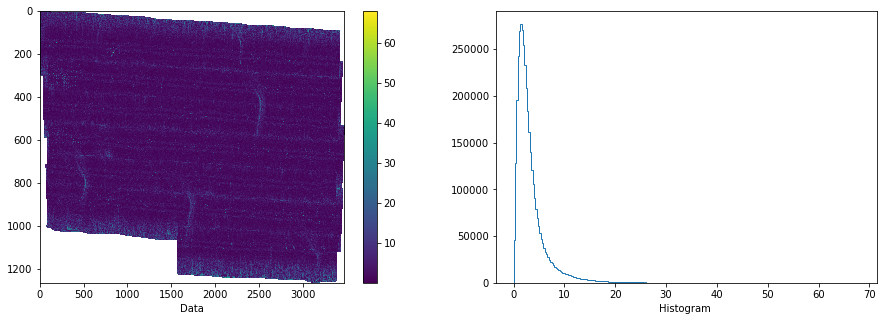

In [7]:
scope.display_geotiff_data(normal_filename_z, "Max slope computed", True)